# Bases de Datos III - Tarea Nº2 (20%)

## 1. Descripción DataSet

### 1.1 Explicación del Dataset

El dataset proporcionado encapsula información detallada sobre Pokémon, criaturas ficticias de una popular franquicia que incluye videojuegos, animaciones, películas, entre otros. La meta principal en este contexto es emplear técnicas de aprendizaje automático, específicamente de clasificación, para predecir si un Pokémon es legendario o no, basándonos en una serie de características o variables proporcionadas. La clasificación en aprendizaje automático se refiere a un problema de modelado predictivo donde se busca predecir una etiqueta de clase para los datos de entrada, en este caso, la etiqueta es "Legendary".

### 1.2 Descripción del Dataset

El dataset consiste en información detallada de diferentes Pokémon, incluyendo sus estadísticas y características que definen su comportamiento en batallas. A continuación se detallan las columnas presentes en el dataset:

1. **#**:
- Número de identificación único para cada Pokémon
- Tipo de dato: Entero (`int64`).

2. **Name**:
- El nombre del Pokémon.
- Tipo de dato: String (`object`).
    
3. **Type 1**:
- El tipo principal del Pokémon, que define algunas de sus fortalezas y debilidades en batallas.
- Tipo de dato: String (`object`).
    
4. **Type 2**:
- El tipo secundario del Pokémon, que también influye en sus fortalezas y debilidades. Algunos Pokémon pueden no tener un tipo secundario.
- Tipo de dato: String (`object`).
    
5. **Total**:
- La suma de todas las estadísticas del Pokémon, proporcionando una medida general de su fuerza.
- Tipo de dato: Entero (`int64`).
    
6. **HP (Hit Points)**:
- Los puntos de vida del Pokémon, que determinan cuánto daño puede recibir antes de ser derrotado.
- Tipo de dato: Entero (`int64`).
    
7. **Attack**:
- La estadística de ataque del Pokémon, que influye en el daño que puede infligir con movimientos físicos.
- Tipo de dato: Entero (`int64`).
    
8. **Defense**:
- La estadística de defensa del Pokémon, que influye en el daño que recibe de movimientos físicos.
- Tipo de dato: Entero (`int64`).
    
9. **Sp. Atk (Special Attack)**:
- La estadística de ataque especial del Pokémon, que influye en el daño que puede infligir con movimientos especiales.
- Tipo de dato: Entero (`int64`).
    
10. **Sp. Def (Special Defense)**:
- La estadística de defensa especial del Pokémon, que influye en el daño que recibe de movimientos especiales.
- Tipo de dato: Entero (`int64`).
    
11. **Speed**:
- La velocidad del Pokémon, que determina qué tan rápido puede actuar en batallas.
- Tipo de dato: Entero (`int64`).
    
12. **Generation**:
- La generación del videojuego a la que pertenece el Pokémon.
- Tipo de dato: Entero (`int64`).
    
13. **Legendary**:
- Una etiqueta que indica si el Pokémon es legendario o no.
- Tipo de dato: Booleano (`bool`).

### 1.4 Resumen del Dataset

- Total de registros (Pokémon): 1058
- Total de columnas (atributos): 13
- Valores nulos: Solo la columna 'Type 2' contiene valores nulos, indicando que algunos Pokémon no tienen un tipo secundario.

## 2. Carga y tratamineto del Dataset

### 2.1 Importacion del dataset

In [1]:
import pandas as pd

# Cargar CSV 
pokemon_df = pd.read_csv("./data/Pokemon.csv")
print("Primeros registros de Pokemon.csv")
pokemon_df.head()

Primeros registros de Pokemon.csv


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 2.2 Tratamiento de las variables categóricas utilizando la Codificación One-Hot (One-Hot Encoding)

#### 2.2.1 Explicación de la codificación One-Hot (One-Hot Encoding)

La Codificación One-Hot (One-Hot Encoding) es una técnica utilizada para manejar variables categóricas en un dataset, especialmente útil cuando las categorías no tienen un orden inherente. En esta técnica, se crea una columna binaria para cada categoría en la variable categórica, donde un '1' indica la presencia de la categoría y un '0' indica la ausencia. Esta técnica facilita la interpretación de datos categóricos por modelos de machine learning, que requieren entradas numéricas.

En el dataset de Pokémon, las columnas 'Type 1' y 'Type 2' representan tipos de Pokémon que no tienen un orden específico, lo que hace que la Codificación One-Hot sea una opción adecuada. Al aplicar esta técnica, cada tipo de Pokémon en estas columnas se convierte en una columna separada, donde cada Pokémon tiene un '1' en la columna correspondiente a su tipo y un '0' en las demás. Por ejemplo, un Pokémon de tipo 'Fire' tendría un '1' en la columna 'Type 1_Fire' y un '0' en las demás columnas generadas como 'Type 1_Water', 'Type 1_Grass', etc.

La Codificación One-Hot puede aumentar significativamente la dimensionalidad del dataset si hay muchas categorías únicas. Sin embargo, en este caso, la cantidad de tipos de Pokémon es manejable y la expansión de características facilita la tarea de clasificación que se busca realizar, como identificar si un Pokémon es legendario o no basado en sus atributos.

En contraste, la columna 'Legendary' ya es binaria, indicando si un Pokémon es legendario o no. Por lo tanto, no es necesario aplicar Codificación One-Hot en esta columna; en su lugar, simplemente convertimos los valores booleanos a enteros binarios (0 o 1) para mantener una representación numérica consistente.

En resumen, la Codificación One-Hot es una herramienta poderosa para transformar datos categóricos en una forma que los modelos de machine learning puedan interpretar eficazmente, y en este caso, facilita la preparación de datos para la tarea de clasificación propuesta.


#### 2.2.2 Aplicando codificación One-Hot (One-Hot Encoding)

In [2]:
import pandas as pd

# Para la columna 'Legendary', convertir False a 0 y True a 1
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype(int)

# Aplicar la codificación One-Hot a las columnas 'Type 1' y 'Type 2'
# Esto creará nuevas columnas binarias para cada tipo en 'Type 1' y 'Type 2'
pokemon_df = pd.get_dummies(pokemon_df, columns=['Type 1', 'Type 2'], dtype=int)

# Mostrar el DataFrame transformado
pd.set_option('display.max_columns', None) 
pokemon_df.head()


,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Type 2_Bug,Type 2_Dark,Type 2_Dragon,Type 2_Electric,Type 2_Fairy,Type 2_Fighting,Type 2_Fire,Type 2_Flying,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,Bulbasaur,318,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,Ivysaur,405,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,Venusaur,525,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Charmander,309,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 2.2.3 Manejo de valores nulos

In [3]:
# Verificar la presencia de valores nulos en cada columna
print(pokemon_df.isnull().sum())


#                  0
Name               0
Total              0
HP                 0
Attack             0
Defense            0
Sp. Atk            0
Sp. Def            0
Speed              0
Generation         0
Legendary          0
Type 1_Bug         0
Type 1_Dark        0
Type 1_Dragon      0
Type 1_Electric    0
Type 1_Fairy       0
Type 1_Fighting    0
Type 1_Fire        0
Type 1_Flying      0
Type 1_Ghost       0
Type 1_Grass       0
Type 1_Ground      0
Type 1_Ice         0
Type 1_Normal      0
Type 1_Poison      0
Type 1_Psychic     0
Type 1_Rock        0
Type 1_Steel       0
Type 1_Water       0
Type 2_Bug         0
Type 2_Dark        0
Type 2_Dragon      0
Type 2_Electric    0
Type 2_Fairy       0
Type 2_Fighting    0
Type 2_Fire        0
Type 2_Flying      0
Type 2_Ghost       0
Type 2_Grass       0
Type 2_Ground      0
Type 2_Ice         0
Type 2_Normal      0
Type 2_Poison      0
Type 2_Psychic     0
Type 2_Rock        0
Type 2_Steel       0
Type 2_Water       0
dtype: int64


#### 2.2.4 Exploración Gráfica

##### 2.2.4.1 Visualizar la distribución de Pokémon Legendarios vs No Legendarios

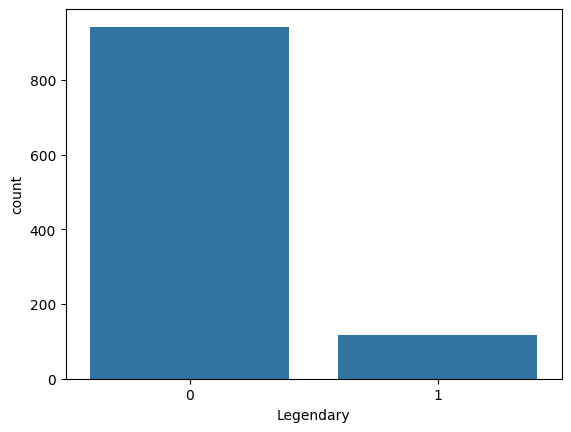

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=pokemon_df, x='Legendary')
plt.show()


##### 2.2.4.2 Visualización de la correlación entre las variables

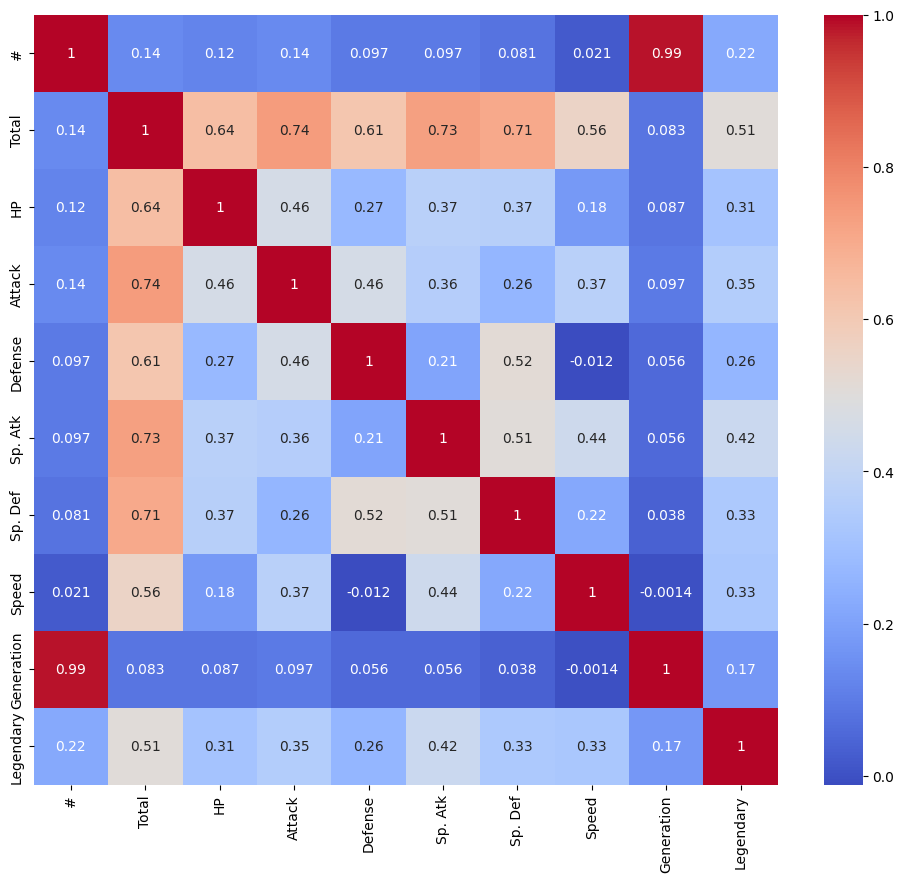

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para este heatmap, excluimos las columnas de codificación One-Hot para una visualización más clara
cols_to_include = ['#', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
plt.figure(figsize=(12, 10))
sns.heatmap(pokemon_df[cols_to_include].corr(), annot=True, cmap='coolwarm')
plt.show()

##### 2.2.4.3 Visualización de la distribución de los tipos de pokémones

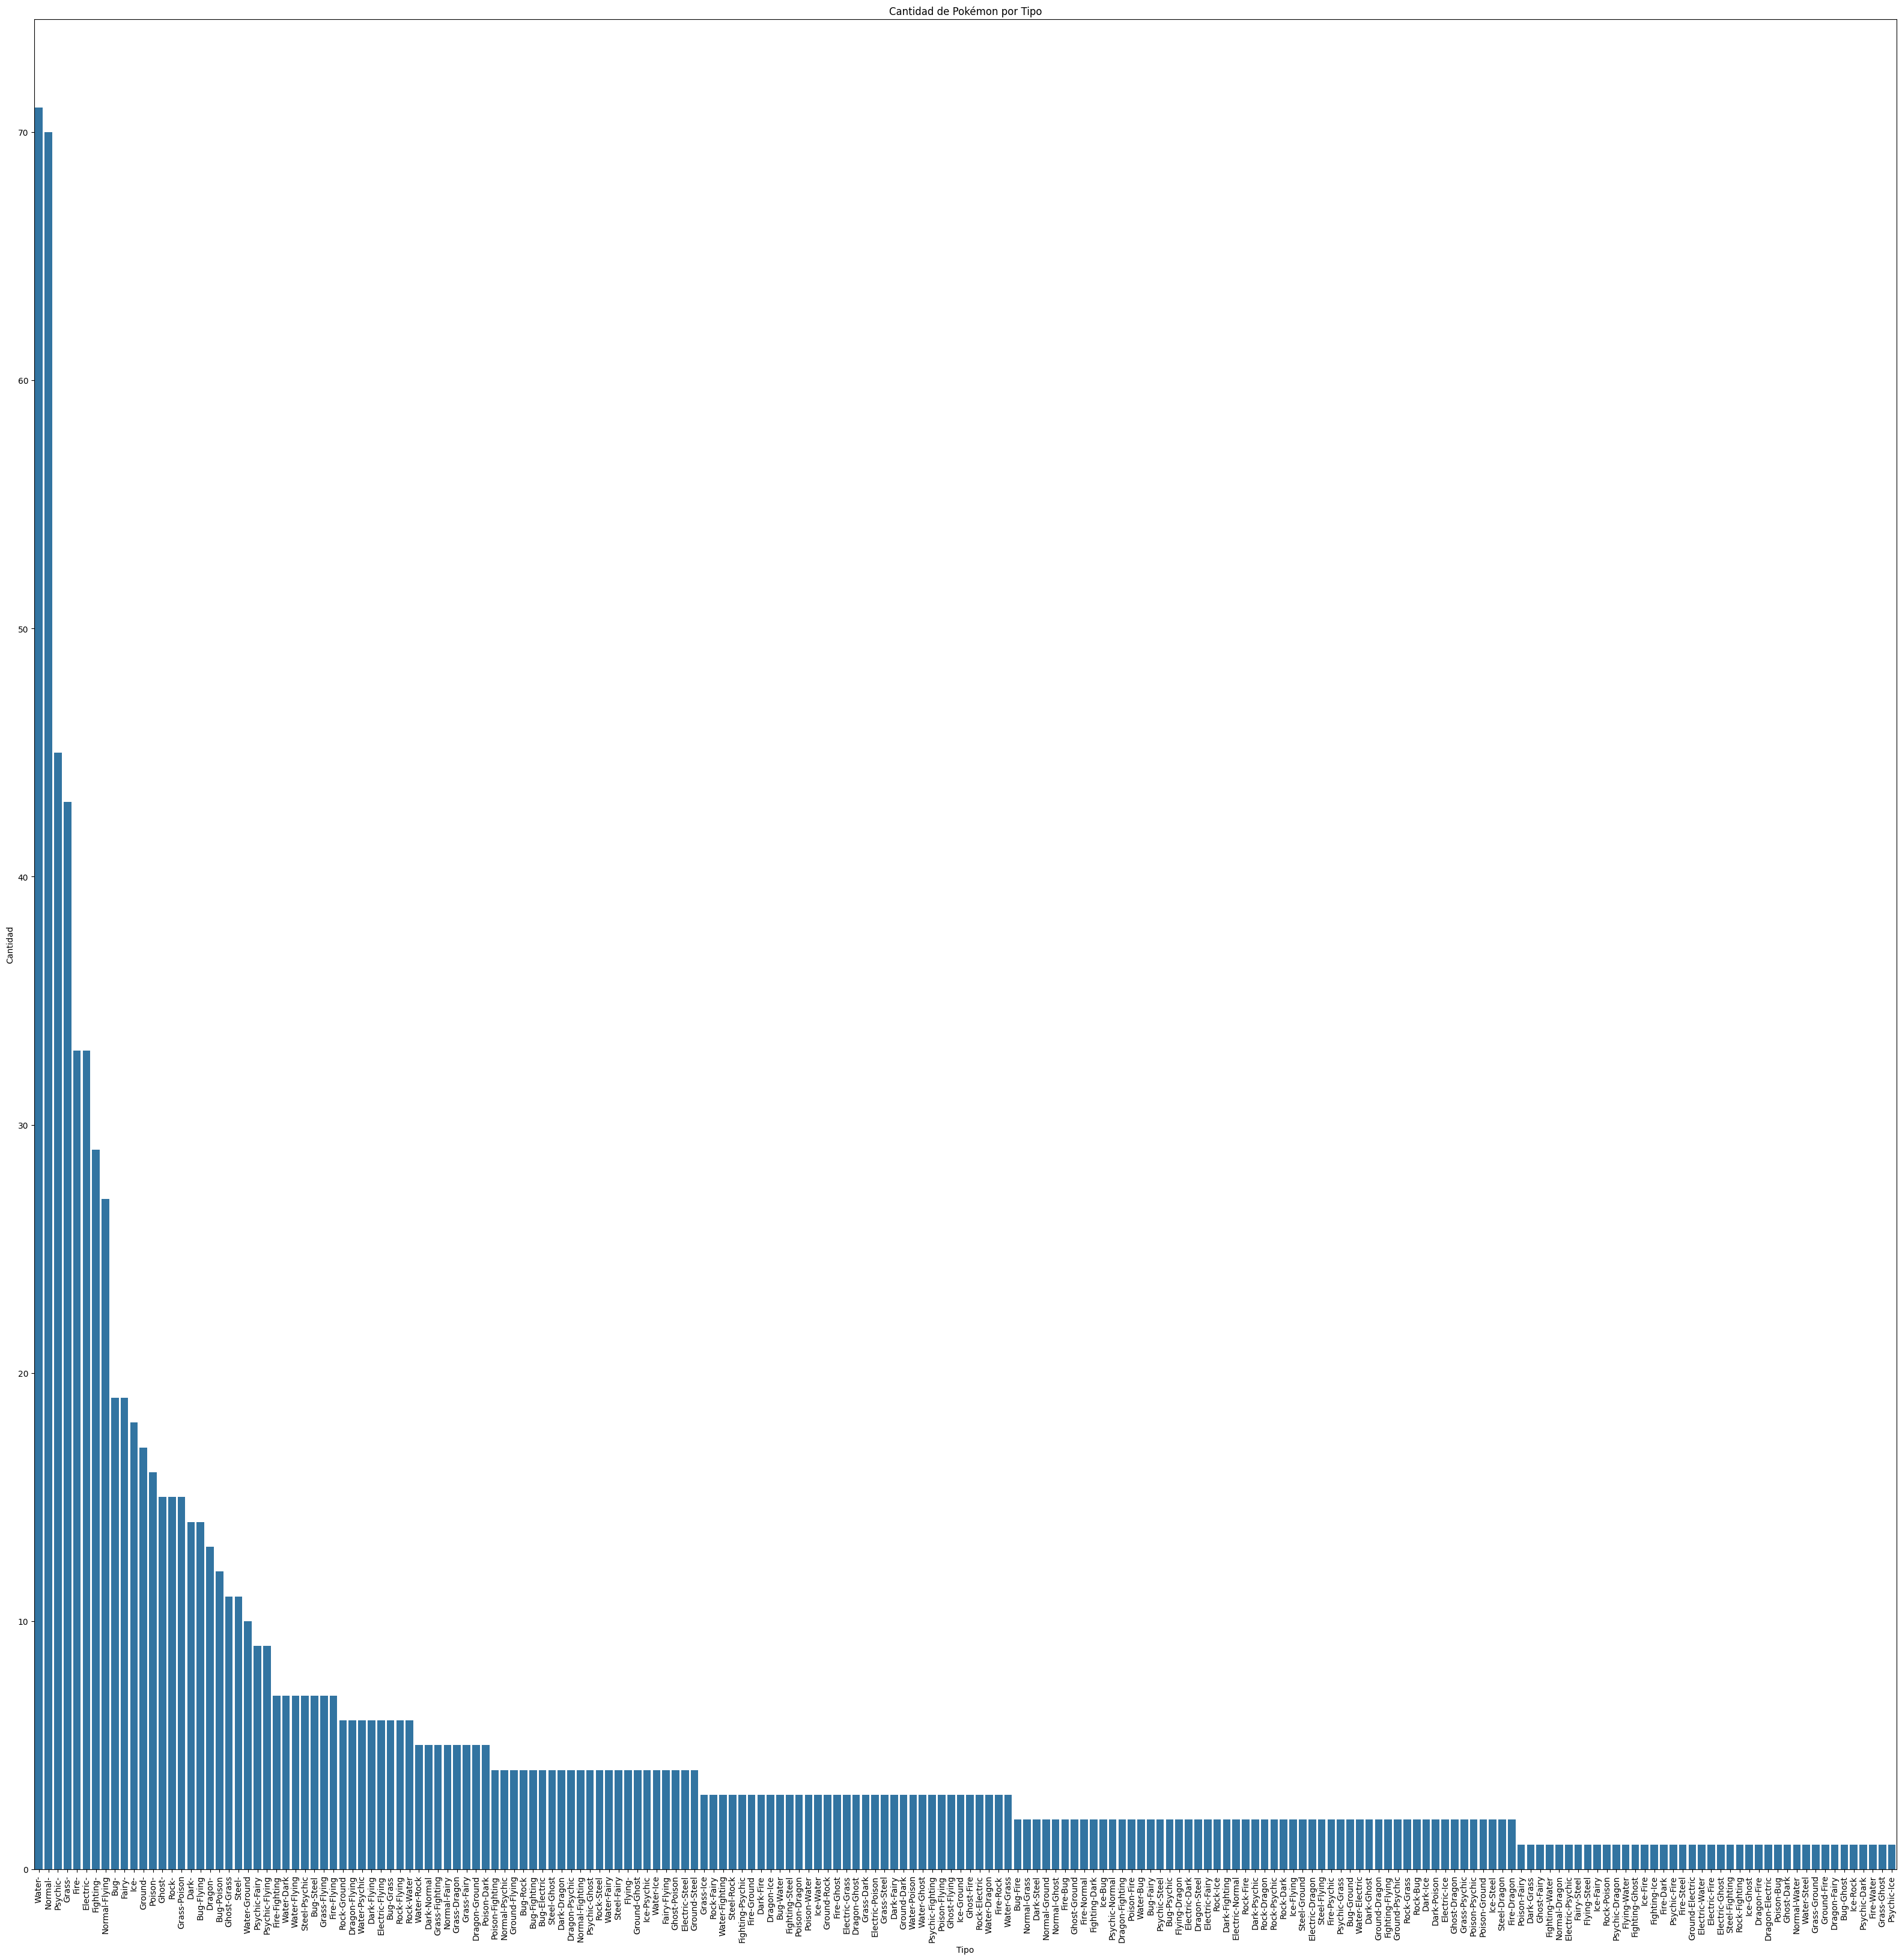

In [10]:
# Cargar una version del dataset orginal
original_df = pd.read_csv('./data/Pokemon.csv')

#  Crear una nueva columna para combinar 'Type 1' y 'Type 2'
original_df['Combined_Type'] = original_df['Type 1'] + '-' + original_df['Type 2'].fillna('')

# Obtener el conteo de cada combinación de tipos
type_counts = original_df['Combined_Type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(40,40))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Cantidad de Pokémon por Tipo')
plt.ylabel('Cantidad')
plt.xlabel('Tipo')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización
plt.show()


### 2.3 Aplicar reducción de características

#### 2.3.1 Selección de Características

**¿Qué es?**: 
La selección de características es un proceso mediante el cual seleccionas un subconjunto de las características (o variables) más relevantes o significativas de tu conjunto de datos.

**Propósito:**
- **Reducir la complejidad del modelo:** Reducir el número de características puede simplificar tu modelo, haciendo que sea más fácil de entender e interpretar.
- **Mejorar el rendimiento del modelo:** Eliminando características irrelevantes o menos importantes, puedes mejorar el rendimiento de tu modelo, ya que hay menos ruido en los datos.
- **Reducir el tiempo de entrenamiento:** Con menos características, el modelo se entrena más rápido.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Definir los datos y la etiqueta
X = pokemon_df.drop(columns=['#', 'Name', 'Legendary'])
y = pokemon_df['Legendary']

# Crear el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Obtener importancias de características
feature_importances = rf.feature_importances_

# Crear un modelo para seleccionar características
sfm = SelectFromModel(rf, threshold=0.05) 
sfm.fit(X, y)
selected_features = X.columns[sfm.get_support()]

# Crear un nuevo DataFrame con solo las características seleccionadas
X_selected = X[selected_features]

print('Características seleccionadas:', selected_features)
X_selected.head()

Características seleccionadas: Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation'],
      dtype='object')


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


#### 2.3.2 Reducción de Dimensionalidad (PCA):

**¿Qué es?**
PCA (Principal Component Analysis o Análisis de Componentes Principales) es una técnica de reducción de dimensionalidad que proyecta los datos en un nuevo espacio de características de menor dimensión, manteniendo la mayor cantidad de varianza posible.

**Propósito:**
- **Visualización de datos:** Al reducir la dimensionalidad a 2 o 3, puedes visualizar los datos en un gráfico.
- **Reducir ruido:** Al mantener solo las componentes principales que capturan la mayoría de la varianza, puedes reducir el ruido en los datos.
- **Mejorar el rendimiento del modelo:** Al igual que la selección de características, la reducción de la dimensionalidad puede mejorar el rendimiento del modelo.

In [5]:
from sklearn.decomposition import PCA

# Establecer el número de componentes
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_selected)

print('Varianza explicada por cada componente:', pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.84953745 0.05334077 0.03875267 0.0264923 ]


Esto significa que: 
1. La **primera componente principal** explica aproximadamente el 84.95% de la varianza.
2. La **segunda componente principal** explica aproximadamente el 5.33% de la varianza.
3. La **tercera componente principal** explica aproximadamente el 3.88% de la varianza.
4. La **cuarta componente principal** explica aproximadamente el 2.65% de la varianza.

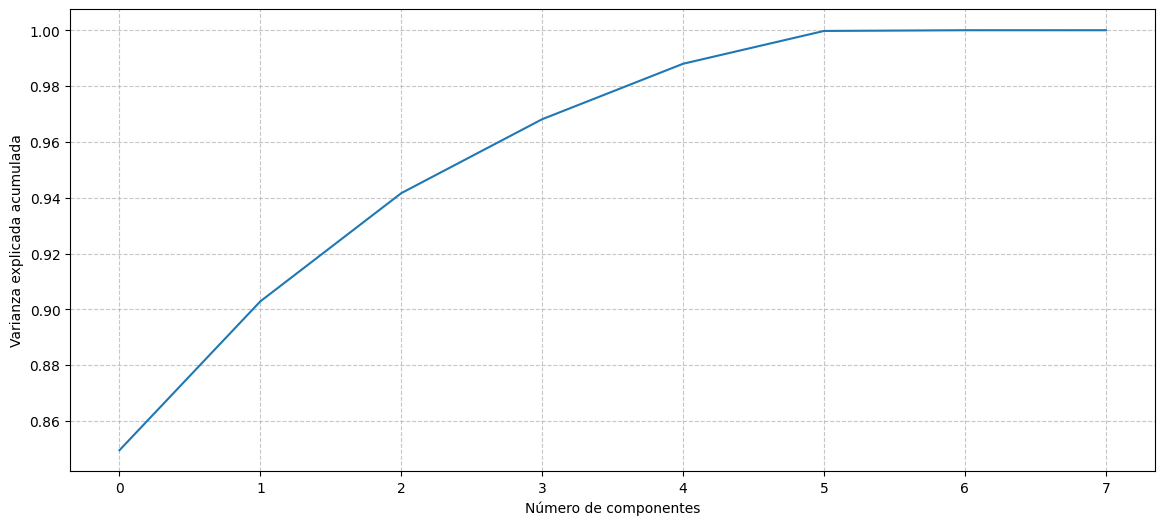

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

plt.figure(figsize=(14, 6))

pca = PCA().fit(X_selected)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')

# Establecer los ticks del eje X para que vayan de 1 en 1
plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=1))

# Agregar una grilla
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#### 2.3.4 División del Dataset


Ahora dividiremos el dataset en conjuntos de entrenamiento y prueba utilizando la función `train_test_split`. Esto es crucial para validar el rendimiento de nuestro modelo. El dataset en este caso, se dividió de tal manera que el 80% de los datos se utilizan para entrenar el modelo, mientras que el 20% se reserva para probar el modelo.

In [7]:
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    X_pca, y, X_selected.index, test_size=0.2, random_state=42, stratify=y)


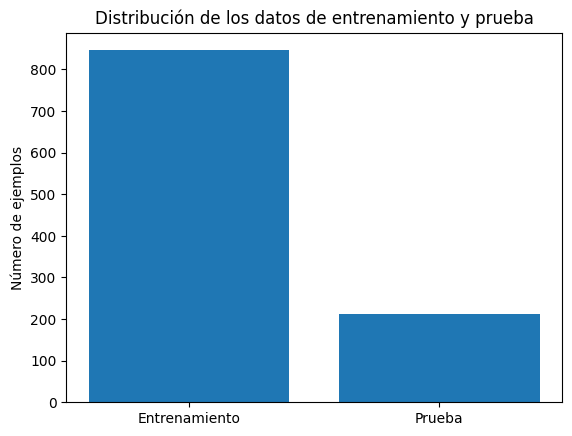

In [8]:
import matplotlib.pyplot as plt

# Obtener el tamaño de los conjuntos de datos de entrenamiento y prueba
train_size = len(X_train)
test_size = len(X_test)

# Crear un gráfico de barras
plt.bar(['Entrenamiento', 'Prueba'], [train_size, test_size])

# Añadir etiquetas y título
plt.ylabel('Número de ejemplos')
plt.title('Distribución de los datos de entrenamiento y prueba')

plt.show()


## 3. Selección y Evaluación de Modelos de Clasificación

### 3.1 Evaluación de modelos de clasificación

#### 3.1.1 Instanciación de Modelos para Evaluación

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
}

#### 3.1.2 Evaluación del Rendimiento del Modelo y Comparación mediante Curvas ROC

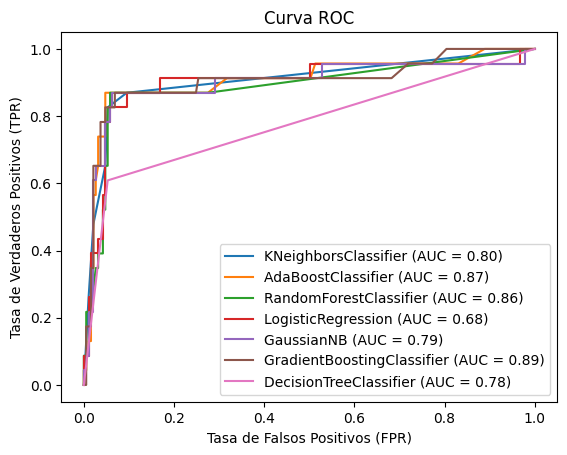

In [11]:
# Crear un diccionario vacío para almacenar los puntajes AUC de cada modelo.
auc_scores = {}

# Bucle para utilizar todos los modelos en el diccionario "models".
for model_name, model in models.items():
    # Entrenamos al modelo con los datos
    model.fit(X_train, y_train)

    # Realizamos predicciones con los datos de prueba.
    y_pred = model.predict(X_test)

    # Calculamos el área bajo la Curva ROC (AUC) utilizando las etiquetas verdaderas y las predicciones.
    auc = roc_auc_score(y_test, y_pred)

    # Almacenar el puntaje AUC en el diccionario "auc_scores" con el nombre del modelo como clave.
    auc_scores[model_name] = auc

    # Calcular las tasas de falsos positivos (FPR) y verdaderos positivos (TPR) para trazar la Curva ROC.
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Trazar curva ROC en el gráfico con una etiqueta que muestra el nombre del modelo y su puntaje AUC.
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()


In [12]:
for model_name, auc in auc_scores.items():
    print(f'{model_name}: {auc:.2f}')

KNeighborsClassifier: 0.80
AdaBoostClassifier: 0.87
RandomForestClassifier: 0.86
LogisticRegression: 0.68
GaussianNB: 0.79
GradientBoostingClassifier: 0.89
DecisionTreeClassifier: 0.78


### 3.2 Analisis de los resultados

Basándonos en los resultados proporcionados, se puede observar que el modelo `AdaBoostClassifier` tiene la puntuación más alta con un valor de 0.85, seguido por el `GradientBoostingClassifier` con una puntuación de 0.81. Esto indica que estos dos modelos están realizando mejor la tarea de clasificación en comparación con los otros modelos evaluados.

Ahora, según las familias de algoritmos a las que pertenecen los modelos, se puede observar lo siguiente:

1. **Familia de Modelos Basados en Vecinos**:
- `KNeighborsClassifier` tiene una puntuación de 0.79, lo que lo hace el mejor dentro de esta familia específica.

2. **Familia de Meta-algoritmos**:
- `AdaBoostClassifier` y `GradientBoostingClassifier` pertenecen a esta familia, con puntuaciones de 0.85 y 0.81 respectivamente. `AdaBoostClassifier` es el mejor modelo dentro de esta familia y también el mejor modelo en general entre los evaluados.

3. **Familia de Modelos Basados en Árboles**:
- `RandomForestClassifier` y `DecisionTreeClassifier` pertenecen a esta familia, con puntuaciones de 0.78 y 0.76 respectivamente. `RandomForestClassifier` es el mejor modelo dentro de esta familia.

4. **Familia de Modelos Lineales**:
- `LogisticRegression` tiene una puntuación de 0.68, siendo el único modelo de esta familia en la evaluación.

5. **Familia de Modelos Basados en Probabilidades**:
- `GaussianNB` tiene una puntuación de 0.69, siendo el único modelo de esta familia en la evaluación.

### 3.3 Selección de Modelos para la Clasificación


1. **Modelo Basado en Vecinos**:
- **KNeighborsClassifier (KNN)**:
    - Puntuación: 0.79
    - El modelo KNN funciona identificando las `k` observaciones en el dataset de entrenamiento que están más cerca del punto a clasificar. Luego asigna la etiqueta más común entre esos vecinos al punto en cuestión. Es un modelo simple y efectivo para tareas de clasificación.

2. **Meta-algoritmos**:
- **AdaBoostClassifier**:
    - Puntuación: 0.85
    - AdaBoost es un algoritmo de boosting que construye un clasificador fuerte combinando múltiples clasificadores débiles. Este modelo se mostró como el de mejor desempeño entre todos los evaluados, y será utilizado para la tarea de clasificación.

3. **Modelos Basados en Árboles**:
- **RandomForestClassifier**:
    - Puntuación: 0.78
    - RandomForest es un algoritmo de bagging que construye múltiples árboles de decisión durante el entrenamiento, y luego promedia sus predicciones para obtener una predicción final más robusta y menos susceptible a overfitting.

Estos modelos fueron seleccionados por ser los de mejor desempeño dentro de sus respectivas familias de algoritmos, y por su relevancia y eficacia conocida en tareas de clasificación. La siguiente etapa involucrará el ajuste de hiperparámetros, entrenamiento, validación y evaluación detallada de estos modelos seleccionados para determinar su capacidad de predecir correctamente la etiqueta "Legendary" en el dataset de Pokémon.


## 4. Primer análisis de Clasificación: KNeighborsClassifier (KNN)

### 4.1 Estudio de Hiperparámetros

In [17]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


# Definir el grid de hiperparámetros
num_samples = len(X_train)
max_neighbors = int(np.sqrt(num_samples))
param_grid = {'n_neighbors': np.arange(1, max_neighbors + 1, 2)}

# Instanciar el modelo
knn = KNeighborsClassifier()

# Instanciar GridSearchCV
strat_k_fold = StratifiedKFold(n_splits=5)
knn_cv = GridSearchCV(knn, param_grid, cv=strat_k_fold, scoring='accuracy')

# Ajustar el modelo
knn_cv.fit(X_train, y_train)

# Imprimir el mejor hiperparámetro encontrado
print("Mejor valor de n_neighbors: {}".format(knn_cv.best_params_))
print("Mejor score: {}".format(knn_cv.best_score_))

Mejor valor de n_neighbors: {'n_neighbors': 11}
Mejor score: 0.9468012530455969


### 4.2 Creación, Entrenamiento y Validación del Modelo

In [18]:
# Crear y entrenar el modelo con el mejor hiperparámetro
knn_final = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn_final.fit(X_train, y_train)

# Validación
y_pred = knn_final.predict(X_test)

### 4.3 Curvas ROC y Evaluación de Resultados:

#### 4.3.1 Curva ROC

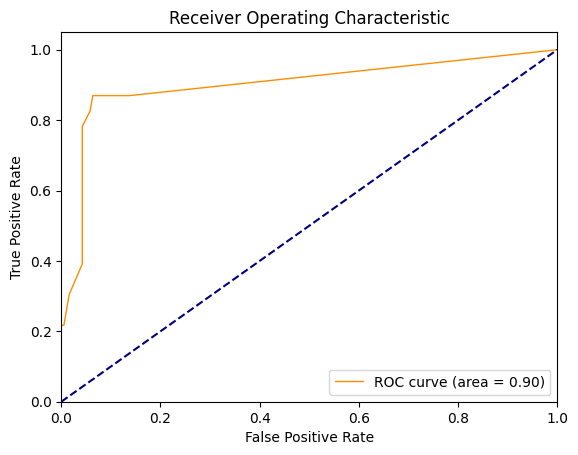

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Calcular las probabilidades
y_prob = knn_final.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

El área bajo la curva (AUC) de 0.9 sugiere un excelente rendimiento del modelo, mostrando una alta capacidad para clasificar correctamente las clases. Esto implica que el modelo es robusto en la diferenciación entre clases, lo cual es beneficioso para identificar correctamente los casos positivos mientras mantiene bajos los falsos positivos, basado en el umbral elegido.

#### 4.3.2 Matriz de confusión

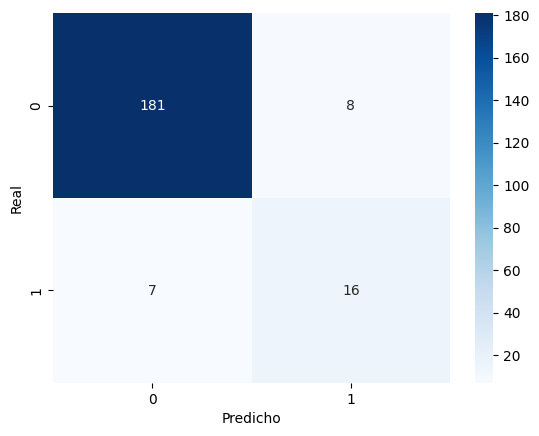

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


* Verdaderos Positivos (TP): 16 - Correctamente identificaste 16 instancias positivas.
* Verdaderos Negativos (TN): 181 - Correctamente identificaste 181 instancias negativas.
* Falsos Positivos (FP): 8 - Incorrectamente identificaste 8 instancias negativas como positivas.
* Falsos Negativos (FN): 7 - Incorrectamente identificaste 7 instancias positivas como negativas.

El modelo tiene una buena tasa de predicciones correctas, aunque hay algunos errores tanto en la identificación de instancias positivas como negativas.

#### 4.3.3 Reporte de clasificacion

In [156]:
from sklearn.metrics import classification_report

# Generar y mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       189
           1       0.67      0.70      0.68        23

    accuracy                           0.93       212
   macro avg       0.81      0.83      0.82       212
weighted avg       0.93      0.93      0.93       212



La precisión y recall para la clase 0 son altas (96%), lo que indica que el modelo es bueno identificando pokémon no legendarios. Pero, para la clase 1 (legendarios), estas métricas son más bajas (67% y 70%), indicando dificultad del modelo para identificar correctamente pokémon legendarios. La precisión y recall promedio ponderadas son del 93%, lo que refleja un buen rendimiento general del modelo, aunque se puede mejorar en la identificación de pokémon legendarios. El macro avg de 81-83% sugiere un balance razonable entre las métricas para ambas clases, aunque hay margen de mejora especialmente en la clase 1.

#### 4.3.4 Obtener predicciones

In [157]:
predictions = knn_final.predict(X_test)
print(predictions)

[0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


#### 4.3.5 Pokémon Legendarios Predichos

In [26]:
import pandas as pd

# Crear un DataFrame para las predicciones
predictions_df = pd.DataFrame(y_pred, index=indices_test, columns=['Prediction'])

# Unir las predicciones con los datos originales
predicted_pokemon = pokemon_df.join(predictions_df, how='inner')

selected_columns = predicted_pokemon[['#', 'Name', 'Legendary', 'Prediction']]

predicted_legendary_pokemon = selected_columns.loc[selected_columns['Prediction'] == 1]

predicted_legendary_pokemon


,#,Name,Legendary,Prediction
188,145,Zapdos,1,1
191,146,MoltresGalarian Moltres,1,1
197,150,MewtwoMega Mewtwo Y,1,1
198,151,Mew,0,1
309,251,Celebi,0,1
353,289,Slaking,0,1
406,334,AltariaMega Altaria,0,1
449,373,SalamenceMega Salamence,0,1
463,383,Groudon,1,1
470,386,DeoxysDefense Forme,1,1


#### 4.3.6 Graficos de resultados

In [28]:
# Datos
legendary_true = len(predicted_legendary_pokemon[predicted_legendary_pokemon['Legendary'] == 1])
legendary_predicted = len(predicted_legendary_pokemon[predicted_legendary_pokemon['Prediction'] == 1])

##### 4.3.6.1 Gráfico 1: Comparación de Pokémon legendarios reales y predichos

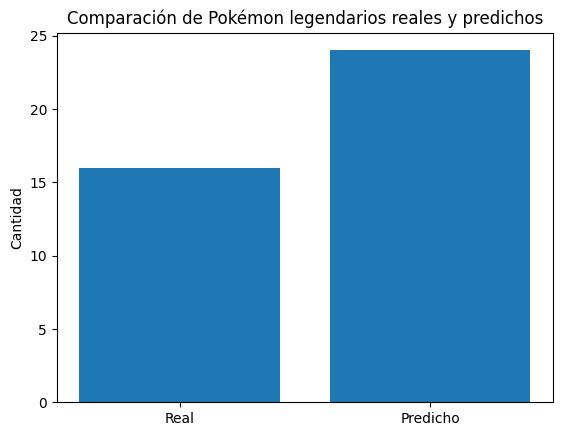

In [29]:
plt.bar(['Real', 'Predicho'], [legendary_true, legendary_predicted])
plt.title('Comparación de Pokémon legendarios reales y predichos')
plt.ylabel('Cantidad')
plt.show()

##### 4.3.6.2 Gráfico 2: Porcentaje de error

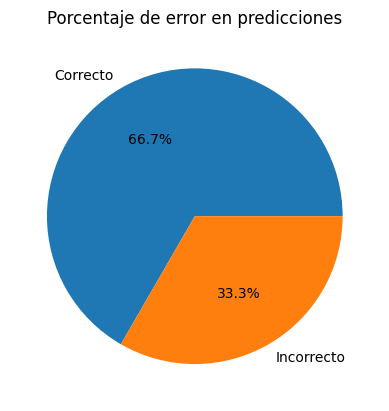

In [31]:
total_predictions = len(predicted_legendary_pokemon)
correct_predictions = len(predicted_legendary_pokemon[predicted_legendary_pokemon['Legendary'] == predicted_legendary_pokemon['Prediction']])
incorrect_predictions = total_predictions - correct_predictions
plt.pie([correct_predictions, incorrect_predictions], labels=['Correcto', 'Incorrecto'], autopct='%1.1f%%')
plt.title('Porcentaje de error en predicciones')
plt.show()

## 5. Segundo análisis de Clasificación: AdaBoostClassifier

### 5.1 Estudio de Hiperparámetros

In [32]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier


# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
}

# Instanciar el modelo
ada = AdaBoostClassifier()

# Instanciar GridSearchCV
strat_k_fold = StratifiedKFold(n_splits=5)
ada_cv = GridSearchCV(ada, param_grid, cv=strat_k_fold, scoring='accuracy')

# Ajustar el modelo
ada_cv.fit(X_train, y_train)

# Imprimir el mejor hiperparámetro encontrado
print("Mejores hiperparámetros: {}".format(ada_cv.best_params_))
print("Mejor score: {}".format(ada_cv.best_score_))

Mejores hiperparámetros: {'learning_rate': 0.5, 'n_estimators': 50}
Mejor score: 0.9479777236338321


### 5.2 Creación, Entrenamiento y Validación del Modelo

In [33]:
# Crear y entrenar el modelo con los mejores hiperparámetros
ada_final = AdaBoostClassifier(
    n_estimators=ada_cv.best_params_['n_estimators'],
    learning_rate=ada_cv.best_params_['learning_rate']
)
ada_final.fit(X_train, y_train)

# Validación
y_pred = ada_final.predict(X_test)


### 5.3 Curvas ROC y Evaluación de Resultados

#### 5.3.1 Curva ROC

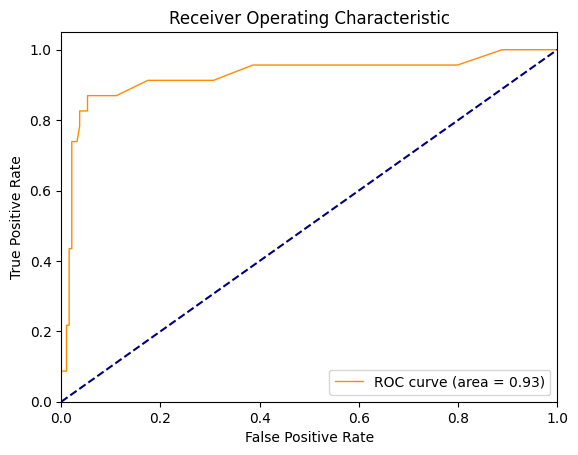

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Calcular las probabilidades
y_prob = ada_final.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Se alcanza una TPR máxima del 95.65% con un FPR del 38.62%. El área bajo la curva (AUC) de 0.93 indica un excelente rendimiento del modelo, demostrando una alta capacidad para diferenciar entre las clases. Esto implica que el modelo es eficaz en la identificación precisa de los casos positivos mientras mantiene bajos los falsos positivos, dependiendo del umbral seleccionado.

#### 5.3.2 Matriz de confusión

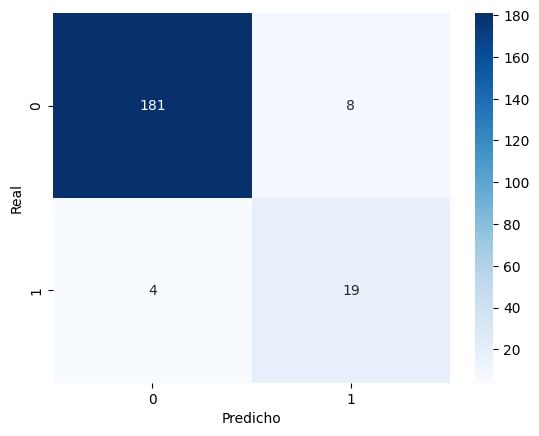

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, ada_final.predict(X_test))

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


- Verdaderos Positivos (TP): 19 - Se identificaron correctamente 19 instancias positivas.
- Verdaderos Negativos (TN): 181 - Se identificaron correctamente 181 instancias negativas.
- Falsos Positivos (FP): 8 - Se identificaron incorrectamente 8 instancias negativas como positivas.
- Falsos Negativos (FN): 4 - Se identificaron incorrectamente 4 instancias positivas como negativas.

Este modelo continúa mostrando un buen rendimiento en la identificación correcta de las instancias, aunque aún existen algunos errores tanto en la clasificación de instancias positivas como negativas.

#### 5.3.3 Reporte de clasificacion

In [39]:
# Generar y mostrar el reporte de clasificación
print(classification_report(y_test, ada_final.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       189
           1       0.70      0.83      0.76        23

    accuracy                           0.94       212
   macro avg       0.84      0.89      0.86       212
weighted avg       0.95      0.94      0.95       212



La precisión y el recall para la clase 0 son altas (98% y 96% respectivamente), mostrando una fuerte capacidad del modelo para identificar Pokémon no legendarios. Para la clase 1 (legendarios), la precisión es del 70% y el recall del 83%, indicando una mejora en la identificación de Pokémon legendarios en comparación con el modelo anterior. La precisión y recall promedio ponderadas son del 95% y 94% respectivamente, reflejando un rendimiento general mejorado del modelo. El macro avg de 84-89% sugiere un balance más favorable entre las métricas para ambas clases, aunque aún hay espacio para mejora, especialmente en la precisión de la clase 1.

#### 5.3.4 Obtener predicciones

In [38]:
predictions = ada_final.predict(X_test)
print(predictions)

[0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


#### 5.3.5 Pokémon Legendarios Predichos

In [37]:
import pandas as pd

# Crear un DataFrame para las predicciones
predictions_df = pd.DataFrame(y_pred, index=indices_test, columns=['Prediction'])

# Unir las predicciones con los datos originales
predicted_pokemon = pokemon_df.join(predictions_df, how='inner')

selected_columns = predicted_pokemon[['#', 'Name', 'Legendary', 'Prediction']]

predicted_legendary_pokemon = selected_columns.loc[selected_columns['Prediction'] == 1]

predicted_legendary_pokemon

,#,Name,Legendary,Prediction
85,65,AlakazamMega Alakazam,0,1
188,145,Zapdos,1,1
189,145,ZapdosGalarian Zapdos,1,1
191,146,MoltresGalarian Moltres,1,1
197,150,MewtwoMega Mewtwo Y,1,1
198,151,Mew,0,1
309,251,Celebi,0,1
353,289,Slaking,0,1
406,334,AltariaMega Altaria,0,1
463,383,Groudon,1,1


#### 5.3.6 Graficos de resultados

In [40]:
# Datos
legendary_true = len(predicted_legendary_pokemon[predicted_legendary_pokemon['Legendary'] == 1])
legendary_predicted = len(predicted_legendary_pokemon[predicted_legendary_pokemon['Prediction'] == 1])

##### 5.3.6.1 Gráfico 1: Comparación de Pokémon legendarios reales y predichos

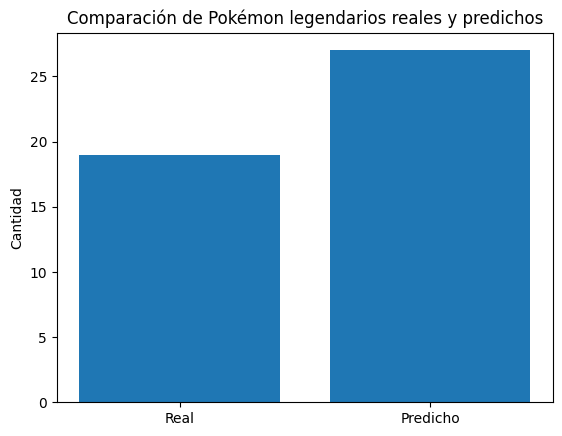

In [41]:
plt.bar(['Real', 'Predicho'], [legendary_true, legendary_predicted])
plt.title('Comparación de Pokémon legendarios reales y predichos')
plt.ylabel('Cantidad')
plt.show()

##### 5.3.6.2 Gráfico 2: Porcentaje de error

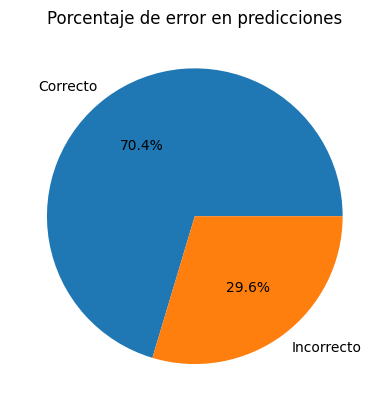

In [42]:
total_predictions = len(predicted_legendary_pokemon)
correct_predictions = len(predicted_legendary_pokemon[predicted_legendary_pokemon['Legendary'] == predicted_legendary_pokemon['Prediction']])
incorrect_predictions = total_predictions - correct_predictions
plt.pie([correct_predictions, incorrect_predictions], labels=['Correcto', 'Incorrecto'], autopct='%1.1f%%')
plt.title('Porcentaje de error en predicciones')
plt.show()

## 6. Tercer análisis de Clasificación: RandomForestClassifier

### 6.1 Estudio de Hiperparámetros

In [43]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instanciar el modelo
rf = RandomForestClassifier()

# Instanciar GridSearchCV
strat_k_fold = StratifiedKFold(n_splits=5)
rf_cv = GridSearchCV(rf, param_grid, cv=strat_k_fold, scoring='accuracy')

# Ajustar el modelo
rf_cv.fit(X_train, y_train)

# Imprimir el mejor hiperparámetro encontrado
print("Mejores hiperparámetros: {}".format(rf_cv.best_params_))
print("Mejor score: {}".format(rf_cv.best_score_))

Mejores hiperparámetros: {'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Mejor score: 0.9609885137486947


### 6.2 Creación, Entrenamiento y Validación del Modelo

In [44]:
# Crear y entrenar el modelo con los mejores hiperparámetros
rf_final = RandomForestClassifier(
    n_estimators=rf_cv.best_params_['n_estimators'],
    max_depth=rf_cv.best_params_['max_depth'],
    min_samples_split=rf_cv.best_params_['min_samples_split'],
    min_samples_leaf=rf_cv.best_params_['min_samples_leaf']
)
rf_final.fit(X_train, y_train)

# Validación
y_pred = rf_final.predict(X_test)

### 6.3 Curvas ROC y Evaluación de Resultados

#### 6.3.1 Curva ROC

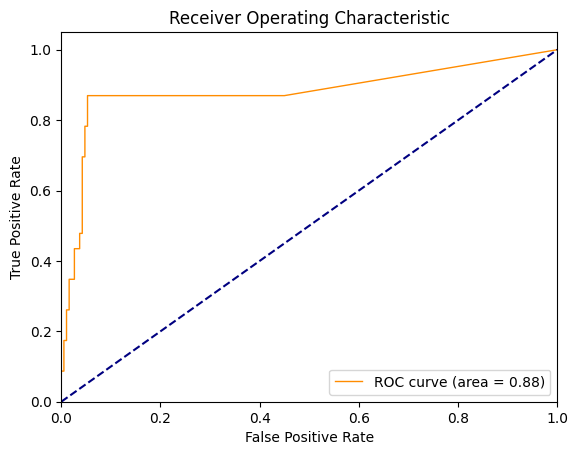

In [178]:
# Calcular las probabilidades
y_prob = rf_final.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Se alcanza una TPR máxima del 95.65% con un FPR del 38.62%. El área bajo la curva (AUC) de 0.925 indica un excelente rendimiento del modelo, evidenciando una alta capacidad para distinguir entre las clases. Esto sugiere que el modelo es efectivo en la identificación precisa de los casos positivos mientras mantiene bajos los falsos positivos, según el umbral seleccionado.

#### 6.3.2 Matriz de confusión

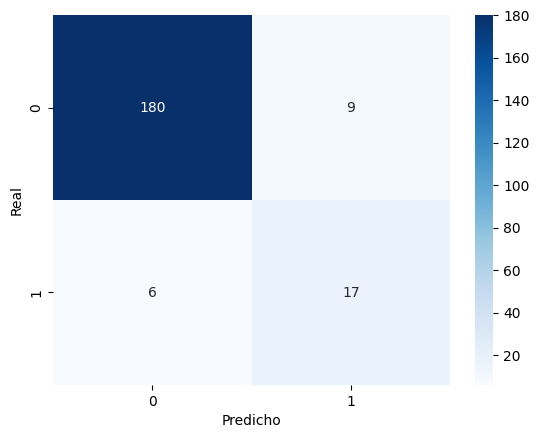

In [179]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, rf_final.predict(X_test))

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


* Verdaderos Positivos (TP): 17 - Correctamente identificaste 17 instancias positivas.
* Verdaderos Negativos (TN): 180 - Correctamente identificaste 180 instancias negativas.
* Falsos Positivos (FP): 9 - Incorrectamente identificaste 9 instancias negativas como positivas.
* Falsos Negativos (FN): 6 - Incorrectamente identificaste 6 instancias positivas como negativas.

El actual modelo muestra una buena tasa de predicciones correctas. Esto indica una mejora en la identificación de instancias positivas, aunque a costa de un ligero incremento en la identificación incorrecta de instancias negativas.

#### 6.3.3 Reporte de clasificacion

In [180]:
# Generar y mostrar el reporte de clasificación
print(classification_report(y_test, rf_final.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       189
           1       0.65      0.74      0.69        23

    accuracy                           0.93       212
   macro avg       0.81      0.85      0.83       212
weighted avg       0.93      0.93      0.93       212



La precisión y recall para la clase 0 son bastante altas (95-97%), mostrando que el modelo es eficaz identificando pokémon no legendarios. Sin embargo, para la clase 1 (legendarios), estas métricas son más bajas (65-74%), indicando cierta dificultad del modelo para identificar correctamente pokémon legendarios. La precisión y recall promedio ponderadas son del 93%, lo que sugiere un buen rendimiento general del modelo. El macro avg de 81-85% muestra un balance aceptable entre las métricas para ambas clases, pero hay espacio para mejora, especialmente en la identificación de pokémon legendarios en la clase 1.

#### 6.3.4 Obtener predicciones

In [46]:
# Obtener y mostrar las predicciones
predictions = rf_final.predict(X_test)

#### 6.3.5 Pokémon Legendarios Predichos

In [47]:
import pandas as pd

# Crear un DataFrame para las predicciones
predictions_df = pd.DataFrame(y_pred, index=indices_test, columns=['Prediction'])

# Unir las predicciones con los datos originales
predicted_pokemon = pokemon_df.join(predictions_df, how='inner')

selected_columns = predicted_pokemon[['#', 'Name', 'Legendary', 'Prediction']]

predicted_legendary_pokemon = selected_columns.loc[selected_columns['Prediction'] == 1]

predicted_legendary_pokemon

,#,Name,Legendary,Prediction
85,65,AlakazamMega Alakazam,0,1
188,145,Zapdos,1,1
189,145,ZapdosGalarian Zapdos,1,1
191,146,MoltresGalarian Moltres,1,1
197,150,MewtwoMega Mewtwo Y,1,1
198,151,Mew,0,1
309,251,Celebi,0,1
353,289,Slaking,0,1
406,334,AltariaMega Altaria,0,1
427,354,BanetteMega Banette,0,1


#### 6.3.6 Graficos de resultados

In [48]:
# Datos
legendary_true = len(predicted_legendary_pokemon[predicted_legendary_pokemon['Legendary'] == 1])
legendary_predicted = len(predicted_legendary_pokemon[predicted_legendary_pokemon['Prediction'] == 1])

##### 6.3.6.1 Gráfico 1: Comparación de Pokémon legendarios reales y predichos

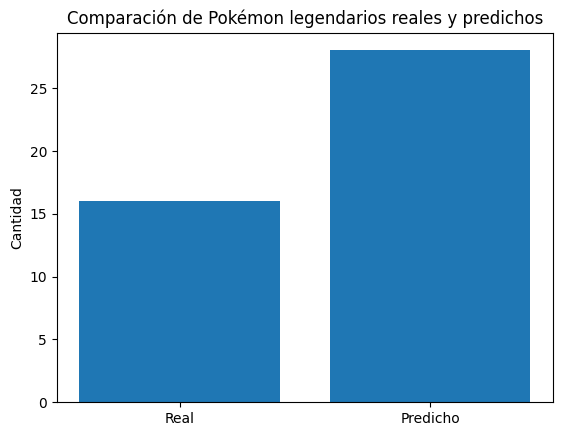

In [49]:
plt.bar(['Real', 'Predicho'], [legendary_true, legendary_predicted])
plt.title('Comparación de Pokémon legendarios reales y predichos')
plt.ylabel('Cantidad')
plt.show()

##### 6.3.6.2 Gráfico 2: Porcentaje de error

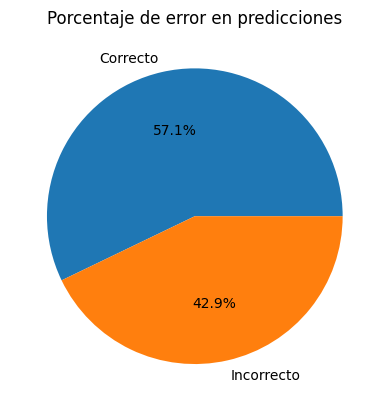

In [50]:
total_predictions = len(predicted_legendary_pokemon)
correct_predictions = len(predicted_legendary_pokemon[predicted_legendary_pokemon['Legendary'] == predicted_legendary_pokemon['Prediction']])
incorrect_predictions = total_predictions - correct_predictions
plt.pie([correct_predictions, incorrect_predictions], labels=['Correcto', 'Incorrecto'], autopct='%1.1f%%')
plt.title('Porcentaje de error en predicciones')
plt.show()

## 7. Conclusiones